# Ollama's Cloud Models

Ollama's cloud models are a new feature that allows users to run large language models without needing a powerful local GPU. These models are automatically offloaded to Ollama's cloud service, providing the same capabilities as local models while enabling the use of larger models that would typically not fit on a personal computer.

## Ollama currently supports the following cloud models

- `deepseek-v3.1:671b-cloud`
- `gpt-oss:20b-cloud`
- `gpt-oss:120b-cloud`
- `kimi-k2:1t-cloud`
- `qwen3-coder:480b-cloud`
- `glm-4.6:cloud`

## Cloud API Access

Cloud models can also be accessed directly on [ollama.com](https://ollama.com/) API. In this mode, ollama acts as a remote Ollama host.

For direct access to ollama cloud api, first create an [API key](https://signin.ollama.com/?client_id=client_01JX0QMHD43PFFCCNXH82A6K8B&redirect_uri=https%3A%2F%2Follama.com%2Fauth%2Fcallback&authorization_session_id=01K7R044KRP365QQA3P6DRQQWB).
Then, set the OLLAMA_API_KEY environment variable to your API key.

```bash
export OLLAMA_API_KEY=your_api_key
```

## Generating a response

First, install [ollama's python library](https://github.com/ollama/ollama-python)

In [1]:
# print("Installing langchain-ollama")
# !pip install langchain-ollama
print("Installing ollama")
!pip install ollama
print("Installing dotenv")
!pip install python-dotenv
print("Installing magic")
!pip install python-magic
print("Installing pymupdf")
!pip install pymupdf
print("Installing python docx")
!pip install python-docx
print("Installing pytesseract")
!pip install pytesseract
print("Installing IPython")
!pip install IPython
print("Installed packages successfully!")
# print("Installing docling")
# !pip install docling
# print("Installing email-validator")
# !pip install pydantic[email]

Installing ollama
Installing dotenv
Installing magic
Installing pymupdf
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 65.3 MB/s eta 0:00:00
Installing python docx
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 9.3 MB/s eta 0:00:00
Installing pytesseract
Installing IPython
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.2 MB/s eta 0:00:00
Installed packages successfully!


## Usage

This code snippet connects to the Ollama cloud API using `your API key`, sends a question to a specific language model (`gpt-oss:120b-cloud`), and then `prints` the model's answer as it's generated

In [2]:
import os
from google.colab import userdata

userdata_ollama = None
try:
  userdata_ollama = userdata.get('OLLAMA_API_KEY')
except:
  pass

if userdata_ollama:
  print("OLLAMA_API_KEY found in google colab\n")
  os.environ['OLLAMA_API_KEY'] = userdata_ollama
elif 'OLLAMA_API_KEY' not in os.environ:
  ollama_api_key = input('Enter your Ollama API key: ')
  os.environ['OLLAMA_API_KEY'] = ollama_api_key

ollama_api_key = os.getenv('OLLAMA_API_KEY')

OLLAMA_API_KEY found in google colab



### Custom Client

A custom client can be created by instantiating Client or AsyncClient from ollama

In [3]:
from ollama import Client
from ollama._types import ResponseError

try:
  client = Client(
        host='https://ollama.com',
        headers={'Authorization': f'Bearer {ollama_api_key}'}
  )

  # messages = [
  #   {
  #     'role': 'user',
  #     'content': 'How are you?',
  #   },
  # ]

  # for part in client.chat('gpt-oss:120b', messages=messages, stream=True):
  #   print(part.message.content, end='', flush=True)
  print("Client Successfully")
except ResponseError as e:
  print(f'Error: {e}')


Client Successfully


## Capabilities



### Tool Calling

Ollama offers support for tool calling, also referred to as function calling. This feature empowers a language model to utilize external tools or functions and integrate the outcomes of these tools into its responses.

#### Supported models

- `deepseek-v3.1:671b-cloud`
- `gpt-oss:20b-cloud`
- `gpt-oss:120b-cloud`
- Browse the latest additions [models to utilize external tools](https://ollama.com/search?c=tools&c=cloud)

In [ ]:
from ollama import web_search, web_fetch

available_tools = {'web_fetch': web_fetch, 'web_search': web_search}


def call_ollama():
  try:
    messages = [
        {
          'role': 'user',
          'content': 'what is ollama?',
        },
    ]
    while(True):
      try:
        result = client.chat(model='deepseek-v3.1:671b', messages=messages, tools=[web_fetch, web_search])
      except Exception as e:
        print(f'Error: {e}')
        break
      if result.message.content:
        print(f'Content: {result.message.content}')

      messages.append(result.message)

      if result.message.tool_calls:
        print(f'Tool Calls: {result.message.tool_calls}')

        for tool_call in result.message.tool_calls:
          function_call = available_tools.get(tool_call.function.name)
          if function_call:
            tool_args = tool_call.function.arguments
            tool_result = function_call(**tool_args)
            print(f'Tool Result: {str(tool_result)[:500]}...')
            messages.append({
                'role': 'tool',
                'content': str(result)[:1000 * 4],
                'tool_name': tool_call.function.name
              }
            )
          else:
            messages.append({
                'role': 'tool',
                'content': f'Tool {tool_call.function.name} not found',
                'tool_name': tool_call.function.name
              }
            )
      else:
        break
  except Exception as e:
    print(f'Error: {e}')

call_ollama()

Content: I'll search for information about Ollama to provide you with a comprehensive answer.
Tool Calls: [ToolCall(function=Function(name='web_search', arguments={'max_results': 3, 'query': 'what is Ollama'}))]
Tool Result: results=[WebSearchResult(content="# Ollama: AI at Your Fingertips\n\nOllama is an advanced AI platform that brings large language models directly to your device. With its privacy-first approach and high-speed processing, Ollama enables seamless AI interactions without cloud dependencies. Whether you're coding, automating tasks, or engaging in deep conversations, Ollama provides a reliable and customizable AI experience.\n\n[Try Online](https://ollama.org/#models)\n\n## What is Ollama?\n\nOllama ...
Content: Based on my search, I can provide you with a comprehensive explanation of what **Ollama** is.

---

### **What is Ollama?**

**Ollama** is an open-source framework and tool designed to run large language models (LLMs) **locally on your own machine**. Think of it

### Thinking

Thinking-capable models can generate a distinct "thinking trace" that details their reasoning process, separate from the final output. This feature allows for auditing the model's steps, visualizing its thought process in user interfaces, or concealing the trace when only the final answer is required.

#### Supported models

- `deepseek-v3.1:671b-cloud`
- `gpt-oss:20b-cloud`
- `gpt-oss:120b-cloud`
- Browse the latest additions under [thinking models](https://ollama.com/search?c=cloud&c=thinking)

In [ ]:
try:
  message = """Solve this expression and explain each algebraic step in plain English: $\frac{\frac{1}{x} + \frac{1}{x + 1}}{\frac{1}{x} - \frac{1}{x + 1}}$"""

  think_messages = [{'role': 'user', 'content': message}]

  thinking_result = client.chat(model='deepseek-v3.1:671b', messages=think_messages, think=True, stream=True)

  in_thinking = False

  for chunk in thinking_result:
    if chunk.message.thinking and not in_thinking:
      in_thinking = True
      print('Thinking:\n', end='')

    if chunk.message.thinking:
      print(chunk.message.thinking, end='')
    elif chunk.message.content:
      if in_thinking:
        print('\n\nAnswer:\n', end='')
        in_thinking = False
      print(chunk.message.content, end='')
except Exception as e:
  print(f'Error: {e}')

Thinking:
I need to solve this expression: \(\frac{\frac{1}{x} + \frac{1}{x + 1}}{\frac{1}{x} - \frac{1}{x + 1}}\). I'll simplify it step by step and explain each step in plain English.

First, I notice that both the numerator and the denominator have fractions with \(x\) and \(x+1\). I should combine these fractions in the numerator and denominator separately.

Let me start with the numerator: \(\frac{1}{x} + \frac{1}{x + 1}\). To add these two fractions, I need a common denominator. The common denominator for \(x\) and \(x+1\) is \(x(x+1)\). So, I'll rewrite each fraction with this common denominator.

For \(\frac{1}{x}\), I multiply the numerator and denominator by \(x+1\) to get \(\frac{1 \cdot (x+1)}{x \cdot (x+1)} = \frac{x+1}{x(x+1)}\).

For \(\frac{1}{x+1}\), I multiply the numerator and denominator by \(x\) to get \(\frac{1 \cdot x}{(x+1) \cdot x} = \frac{x}{x(x+1)}\).

So, the numerator becomes \(\frac{x+1}{x(x+1)} + \frac{x}{x(x+1)} = \frac{(x+1) + x}{x(x+1)} = \frac{2x+1}{x

### Streaming

Streaming lets you display text as the model generates it, rather than waiting for the full response. It's on by default in the REST API but off by default in SDKs, you must set `stream=True` to enable it there

#### Key Streaming Concepts

- **Chatting**: Receive and render partial assistant messages in real time, as each chunk arrives

- **Thinking**: Some models include a `thinking` field in chunks, allowing you to optionally show the model's reasoning before the final answer

- **Tool calling**: Tool calls may appear incrementally in the stream; you can detect them, run the tools, and send the results back into the conversation

In [ ]:
query = """
Explain me this code snippet:

from ollama import chat

messages = [
  {
    'role': 'user',
    'content': 'Why is the sky blue?',
  },
]

response = chat('gemma3', messages=messages)
print(response['message']['content'])
"""

message = [{'role': 'user', 'content': query}]
for stream in client.chat(model='qwen3-coder:480b', messages=message, stream=True):
  print(stream.message.content, end='', flush=True)

This code snippet demonstrates how to use the Ollama Python client to interact with a large language model. Let me break it down:

## Code Breakdown

### 1. Import Statement
```python
from ollama import chat
```
- Imports the `chat` function from the `ollama` library
- Ollama is a tool for running large language models locally

### 2. Messages Array
```python
messages = [
  {
    'role': 'user',
    'content': 'Why is the sky blue?',
  },
]
```
- Creates a list containing one message dictionary
- The message has:
  - `role`: 'user' (indicating this is input from the user)
  - `content`: The actual question being asked

### 3. API Call
```python
response = chat('gemma3', messages=messages)
```
- Calls the `chat` function with two parameters:
  - `'gemma3'`: The name of the AI model to use
  - `messages=messages`: The conversation history (just the user's question in this case)

### 4. Output
```python
print(response['message']['content'])
```
- Prints the AI's response content from the 

### Structured Outputs

Structured outputs let you enforce a specific JSON schema on model responses, ensuring reliable extraction of structured data, consistent replies, or formatted image descriptions

You can enable this in two ways:

1. Generic JSON: Set the `format` parameter to `json` to ensure the output is valid JSON.

2. Specific Schema: Provide a detailed JSON schema (using tools like Pydantic in Python or Zod in JavaScript) to the format parameter. This forces the model to return data matching your exact structure.

In [ ]:
from pydantic import BaseModel, EmailStr, HttpUrl, Field
from typing import Optional
#import uuid

class Product(BaseModel):
    #id: Optional[str] = None
    name: str = Field(..., description='Name of the product')
    description: str = Field(..., description='Description of the product')
    price: float = Field(0, description='Price of the product (e.g. $199.99)')
    currency: str = Field('USD', description='Currency of the price')
    category: Optional[str] = None # Category is not always present
    in_stock: bool = Field(..., description='Whether the product is in stock')

class ProviderDetails(BaseModel):
    #id: Optional[str] = None
    name: str = Field(..., description='Name of the provider')
    description: str = Field(..., description='Description of the provider')
    email: EmailStr = Field(..., description='Email of the provider')
    phone: Optional[str] = None
    website: HttpUrl = Field(..., description='Website of the provider')
    address: str = Field(..., description='Address of the provider')


class Provider(BaseModel):
    provider: ProviderDetails = Field(None, description='Details of the provider')
    products: list[Product] = Field(default_factory=list, description='List of products provided by the provider')


def extract_provider_and_products(text: str) -> Provider:
    """
    Takes a text and extracts Provider and Product information
    structured according to the defined Pydantic models.
    """
    prompt = f"""
    Analyze the following text and extract the information about the Provider and their Products into a JSON format.
    The JSON must contain a top-level key 'provider' which holds an object with the fields:
    'name', 'description', 'email', 'phone', 'website', and 'address.
    It must also contain a top-level key 'products' which is an list of objects. Each product object must have the fields:
    'name', 'description', 'price' (as a number, e.g., 199.99, not $199.99), 'currency', 'category', and 'in_stock' (as a boolean, true/false).

    Text: {text}

    If a field is not present, omit it (do not return null).
    Ensure the output conforms strictly to the JSON format provided.
    Only return the JSON, do not include any markdown or other text.
    """

    response = client.chat(
        model='gpt-oss:120b', # Replace with your chosen model
        messages=[{'role': 'user', 'content': prompt}],
        format=Provider.model_json_schema(), # Use the schema to enforce structure
        options={'temperature': 0},  # Set temperature to 0 for more deterministic output
    )

    # Validate the model response against the Pydantic schema
    provider_data = Provider.model_validate_json(response.message.content)
    return provider_data


supplier_text = """
Meet TechSolutions Inc., a leading provider of innovative software development tools and services.
We are headquartered in Austin, Texas, and have been delivering cutting-edge solutions to businesses
worldwide for the past eight years. You can reach us at contact@techsolutions.com or call (555) 987-6543.
Visit our website: https://www.techsolutions.com

Our current product catalog includes:
- CodeMaster Pro IDE: Advanced integrated development environment, $199.99/user/year, category software, currently in stock.
- BugFinder Suite: Comprehensive debugging toolkit, $49.99/month, category software, currently in stock.
- CloudDeploy Platform: Automated deployment service, $29.99/month per project, category software, currently in stock.
"""
try:
  extracted_data = extract_provider_and_products(supplier_text)
  print(extracted_data.model_dump_json(indent=2))
except Exception as e:
  print(f'Error during extraction or validation: {e}')

{
  "provider": {
    "name": "TechSolutions Inc.",
    "description": "a leading provider of innovative software development tools and services.",
    "email": "contact@techsolutions.com",
    "phone": "(555) 987-6543",
    "website": "https://www.techsolutions.com/",
    "address": "Austin, Texas"
  },
  "products": [
    {
      "name": "CodeMaster Pro IDE",
      "description": "Advanced integrated development environment",
      "price": 199.99,
      "currency": "USD",
      "category": "software",
      "in_stock": true
    },
    {
      "name": "BugFinder Suite",
      "description": "Comprehensive debugging toolkit",
      "price": 49.99,
      "currency": "USD",
      "category": "software",
      "in_stock": true
    },
    {
      "name": "CloudDeploy Platform",
      "description": "Automated deployment service",
      "price": 29.99,
      "currency": "USD",
      "category": "software",
      "in_stock": true
    }
  ]
}


### Vision

Vision models are AI models that can process both images and text to perform tasks like describing, classifying, and answering questions about visual content.

#### Supported models

- `qwen3-vl:235b-cloud`
- Browse the latest additions under [vision models](https://ollama.com/search?c=vision&c=cloud)

**Request (with images)**

To submit images to vision models such as `qwen3-vl`, `llava` or `bakllava`, provide a list of base64-encoded `images`

This image displays a **mathematical integral problem** with branding.

Here’s a breakdown:

---

### **Main Content:**
- **Title**: “Integrales” (Spanish for “Integrals”) — written in large, white, italicized font on a dark red background.
- **Mathematical Expression**:
  ```
  ∫(5x⁴ - 6x² + 3) dx
  ```
  This is an **indefinite integral** of a polynomial function. The task is to find the antiderivative of the expression inside the parentheses with respect to *x*.

---

### **Branding / Logo:**
- In the top-right corner, there’s a logo that reads:
  ```
  JULIO
  PROFE
  NET®
  ```
  This likely refers to **“Julio Profe Net”**, a Spanish-language educational YouTube channel or website created by Julio Rios, a math teacher known for explaining calculus, algebra, and other math topics.

---

### **Purpose:**
This image is likely a **thumbnail or title slide** for an educational video or lesson on how to solve this specific integral — part of a series on integral calculus.

---

### **So

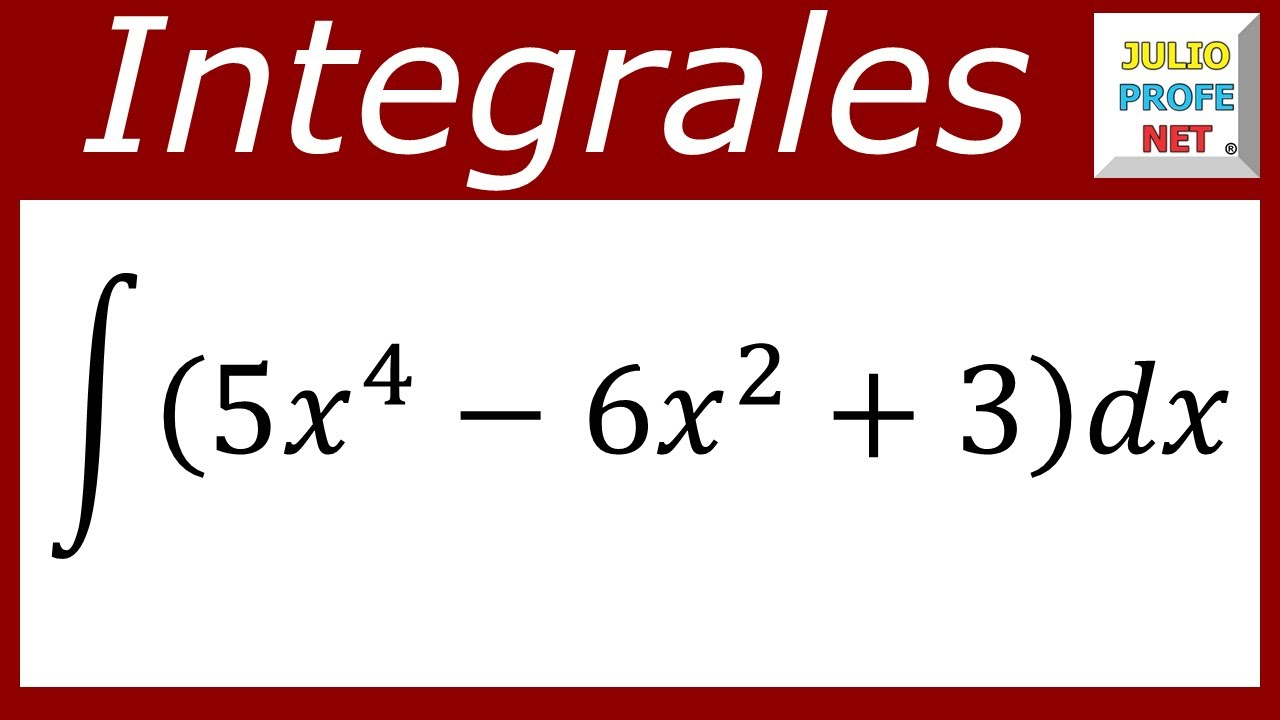

In [ ]:
import base64
from IPython.display import Image, display

image_path = '/content/integral.jpg'
image_base64 = base64.b64encode(open(image_path, 'rb').read()).decode('utf-8')

messages = [
  {
    'role': 'user',
    'content': 'What is in this image?',
    'images': [image_base64]
  }
]

try:
  result = client.chat(model='qwen3-vl:235b', messages=messages, stream=True)
  for part in result:
    print(part.message.content, end='', flush=True)
  display(Image(data=image_path, width=300))
except Exception as e:
  print(f'Error: {e}')

## Document processing

In [4]:
import fitz
import base64
from io import BytesIO
from docx import Document
from ollama import Client

class DocumentProcessor:

  def __init__(self) -> None:
    self.client = Client(host='https://ollama.com', headers={'Authorization': f'Bearer {ollama_api_key}'})

  def _extract_text_from_pdf_bytes(self, pdf_bytes: bytes) -> str:
    """
    Extract text from PDF bytes using PyMuPDF.

    Args:
      pdf_bytes (bytes): The raw bytes of the PDF file.

    Returns:
      str: The extracted text from the PDF pages.
    """
    doc = fitz.open(stream=pdf_bytes, filetype='pdf')
    text = ''
    for page in doc:
      text += page.get_text()
    doc.close()
    return self._clean_text(text[:10000])

  def _extract_text_from_docx_bytes(self, docx_bytes: bytes) -> str:
    """
    Extract text from DOCX bytes using python-docx.

    Args:
      docx_bytes (bytes): The raw bytes of the DOCX file.

    Returns:
      str: The extracted text from the DOCX paragraphs.

    """
    doc = Document(BytesIO(docx_bytes))
    text = ''
    for paragraph in doc.paragraphs:
      text += paragraph.text + "\n"
    return self._clean_text(text[:10000].strip())

  def _extract_content_from_image_bytes(self, image_bytes: bytes) -> str:
    image_base64 = base64.b64encode(image_bytes).decode('utf-8')
    messages = [
      {
        'role': 'user',
        'content': 'Extract all visible text and then generate a clear and concise summary',
        'images': [image_base64]
      }
    ]

    try:
      result = self.client.chat(model='qwen3-vl:235b', messages=messages, think=True)
      return self._clean_text(result.message.content)
    except Exception as e:
      print(f'Error: {e}')

  def _clean_text(self, text: str) -> str:
    try:
      result = self.client.chat(model='deepseek-v3.1:671b', messages=[{'role': 'user', 'content': f'Generate a clear and concise summary: {text}'}], think=True)
      return result.message.content
    except Exception as e:
      print(f'Error: {e}')
      return None

  def process_document(self, filename: str, file_bytes: bytes) -> str:
    """
    Process a document (PDF, DOCX, or IMAGE) and extract text.

    Args:
      filename (str): The name of the file.
      file_bytes (bytes): The raw bytes of the file.
    """
    if filename.lower().endswith(".pdf"):
      return self._extract_text_from_pdf_bytes(file_bytes)
    elif filename.lower().endswith(".docx"):
      return self._extract_text_from_docx_bytes(file_bytes)
    elif filename.lower().endswith(".jpg") or filename.lower().endswith(".png"):
      return self._extract_content_from_image_bytes(file_bytes)
    else:
      raise ValueError(f"Unsupported file extension for file: {filename}")


In [5]:
from pathlib import Path

try:

  file = Path('/content/react-cheatsheet.pdf')

  with open(file, 'rb') as f:
    file_bytes = f.read()

  # print(file.name)
  # print(file_bytes)

  document = DocumentProcessor()
  extracted_content = document.process_document(file.name, file_bytes)

  if extracted_content:
    response = client.chat(model='gpt-oss:120b', messages=[{'role': 'user','content': f'Explain me this content in 5 lines: {extracted_content}'}])
    print(response.message.content)
  else:
    raise ValueError("No content extracted from the file.")
except Exception as e:
  print(f'Error: {e}')

- Start a React project with Vite (`npm create vite`) and build components that return one root element, using `<></>` fragments when you need a wrapper without extra DOM nodes.  
- Pass immutable **props** (typed with TypeScript interfaces) to customize components, and use the special `children` prop to render nested content.  
- Render conditionally with JavaScript expressions (`?`, `&&`, early returns) and generate lists with `.map()`, always assigning a unique `key`.  
- Manage state and side‑effects with core hooks (`useState`, `useEffect`, `useContext`) and auxiliary hooks (`useReducer`, `useRef`, `useMemo`, `useCallback`, `useLayoutEffect`) while obeying the rules‑of‑hooks (call order, no loops/conditions, functional scope, “use” prefix).  
- Leverage advanced patterns like custom hooks, Suspense for async loading, and the React Compiler for automatic performance gains, and handle events with camelCase props (`onClick`, `onChange`).
